# IMBD Movies Dataset EDA

## Genel Analiz Raporu

### Yıllara Göre Film Süreleri:
İncelemeler, film sürelerinin yıllar ilerledikçe arttığını göstermektedir. Özellikle 20. yüzyılın sonlarından itibaren, filmlerin ortalama süresinde gözle görülür bir artış yaşanmıştır. Bu durum, izleyicilerin daha uzun içeriklere ilgi göstermesi ve film bu talebe uyum sağlaması ile açıklanabilir.

### Yıllara Göre Rating Değişimi: 
Rating verilerine bakıldığında, 21. yüzyıl öncesi filmlerin ratinglerinin giderek arttığı; fakat 21. yüzyıla girişle birlikte bu artış eğiliminin yerini önemli bir düşüşe bıraktığı görülmektedir. Bu düşüş, içeriklerdeki değişen temalar, izleyici beklentilerindeki farklılıklar ve artan eleştirel bakış açısı gibi faktörlerle ilişkili olabilir.

### Popüler Türler: 
En popüler türün “Drama” olduğu ve onu “Comedy” türünün takip ettiği tespit edilmiştir. Bu, izleyicilerin ağırlıklı olarak dram ve komedi türlerinde içeriklere daha fazla ilgi gösterdiğini işaret etmektedir.

### Ortalama Rating:
Filmlerin ortalama ratinginin 6.76 olduğu görülmüş olup bu değer filmlerin genel zevke hitap ettiği söylenebilir.
### En Uzun Film: 
990 dakikalık süresiyle "The Vietnam War", veri setindeki en uzun filmdir.
### En Çok Oy Alan Film: 
1,844,075 oyla "The Lord of the Rings: The Fellowship of the Ring" en çok oy alan filmdir ve izleyiciler arasında büyük popülariteye sahiptir.
### Ortalama Film Süresi: 
Filmlerin ortalama süresi 73.77 dakika olarak tespit edilmiştir, bu da genellikle bir saatten uzun süren içeriklerin tercih edildiğini göstermektedir.


### Veri seti ve kütüphaneleri ekleme

In [188]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

plt.style.use('ggplot')

import warnings
warnings.filterwarnings("ignore")

from collections import Counter

data = pd.read_csv(r'C:\Users\Ufuk\OneDrive\Masaüstü\BEDLAB_01\imbd.csv')

def data_temizle(df): # veriyi normalleştirme
    df['year'] = df['year'].str.extract('(\d{4})').astype(float)
    df['duration'] = df['duration'].str.extract('(\d+)').astype(float)
    df['votes'] = df['votes'].str.replace(',', '').astype(float)
    df['rating'] = df['rating'].astype(float)
    df['genre'] = df['genre'].str.split(',')
    
    return data
data=data_temizle(data)

### Veri setine ilk bakış

In [191]:
print("\nVeri seti boyutu:", data.shape)
print("\nVeri seti sütunları:\n", data.columns.tolist())
print("\nVeri seti bilgi özeti:\n"),data.info()
print("\nVeri setindeki kayıp veriler:\n"),data.isna().sum()



Veri seti boyutu: (9957, 9)

Veri seti sütunları:
 ['title', 'year', 'certificate', 'duration', 'genre', 'rating', 'description', 'stars', 'votes']

Veri seti bilgi özeti:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9957 entries, 0 to 9956
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   title        9957 non-null   object 
 1   year         9326 non-null   float64
 2   certificate  6504 non-null   object 
 3   duration     7921 non-null   float64
 4   genre        9884 non-null   object 
 5   rating       8784 non-null   float64
 6   description  9957 non-null   object 
 7   stars        9957 non-null   object 
 8   votes        8784 non-null   float64
dtypes: float64(4), object(5)
memory usage: 700.2+ KB

Veri setindeki kayıp veriler:



(None,
 title             0
 year            631
 certificate    3453
 duration       2036
 genre            73
 rating         1173
 description       0
 stars             0
 votes          1173
 dtype: int64)

In [193]:
data.describe(include='all')

,title,year,certificate,duration,genre,rating,description,stars,votes
count,9957,9326.000000,6504,7921.00000,9884,8784.000000,9957,9957,8.784000e+03
unique,7912,NaN,20,NaN,569,NaN,9433,8615,NaN
top,Top Gear,NaN,TV-MA,NaN,[Comedy],NaN,Add a Plot,[],NaN
freq,92,NaN,2520,NaN,859,NaN,434,403,NaN
mean,NaN,2015.796376,NaN,73.77162,NaN,6.764515,NaN,NaN,1.952319e+04
std,NaN,8.494719,NaN,50.28189,NaN,1.214840,NaN,NaN,8.757844e+04
min,NaN,1932.000000,NaN,1.00000,NaN,1.700000,NaN,NaN,5.000000e+00
25%,NaN,2015.000000,NaN,42.00000,NaN,6.100000,NaN,NaN,2.850000e+02
50%,NaN,2018.000000,NaN,67.00000,NaN,6.900000,NaN,NaN,1.187000e+03
75%,NaN,2020.000000,NaN,98.00000,NaN,7.600000,NaN,NaN,5.421750e+03


### Genel özellik istatistikleri

In [196]:
print("\nRating İstatistikleri:")
print(data['rating'].describe())
print("\nSüre İstatistikleri:")
print(data['duration'].describe())
print("\nOy Sayısı İstatistikleri:")
print(data['votes'].describe())


Rating İstatistikleri:
count    8784.000000
mean        6.764515
std         1.214840
min         1.700000
25%         6.100000
50%         6.900000
75%         7.600000
max         9.900000
Name: rating, dtype: float64

Süre İstatistikleri:
count    7921.00000
mean       73.77162
std        50.28189
min         1.00000
25%        42.00000
50%        67.00000
75%        98.00000
max       990.00000
Name: duration, dtype: float64

Oy Sayısı İstatistikleri:
count    8.784000e+03
mean     1.952319e+04
std      8.757844e+04
min      5.000000e+00
25%      2.850000e+02
50%      1.187000e+03
75%      5.421750e+03
max      1.844075e+06
Name: votes, dtype: float64


### Veri Seti Korelasyon İncelemeleri

In [199]:

print("Rating ve votes arasındaki korelasyon değeri = ",data['rating'].corr(data['votes']))
print("Rating ve duration arasındaki korelasyon değeri = ",data['rating'].corr(data['duration']))

Rating ve votes arasındaki korelasyon değeri =  0.14262240661726328
Rating ve duration arasındaki korelasyon değeri =  -0.16624675640775702


### En Yüksek Puan alan 10 Film

In [202]:
print(data.nlargest(10, 'rating')[['title', 'rating', 'year', 'votes']])

                           title  rating    year      votes
9444             BoJack Horseman     9.9  2014.0    16066.0
17                          1899     9.6  2022.0      853.0
8161  Avatar: The Last Airbender     9.6  2005.0     5221.0
8259                      Dexter     9.6  2006.0    10604.0
8557    JoJo's Bizarre Adventure     9.6  2012.0     1442.0
8907  Avatar: The Last Airbender     9.6  2005.0     3953.0
9578             Stranger Things     9.6  2016.0    36276.0
7                   Breaking Bad     9.5  2008.0  1831340.0
8044  Avatar: The Last Airbender     9.5  2005.0     5383.0
8819                        Dark     9.5  2017.0    14007.0


### En Popüler 10 Tür

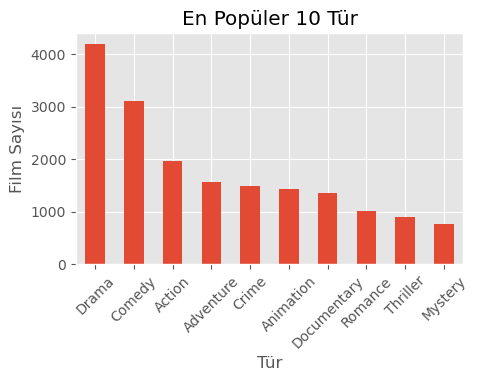

In [205]:
all_genres = [genre.strip() for sublist in data['genre'] if isinstance(sublist, list) for genre in sublist]
genre_counts = Counter(all_genres)
top_10_genres = genre_counts.most_common(10)

plt.figure(figsize=(5, 3))
pd.Series(dict(top_10_genres)).plot(kind='bar')
plt.title('En Popüler 10 Tür')
plt.xlabel('Tür')
plt.ylabel('Film Sayısı')
plt.xticks(rotation=45)
plt.show()


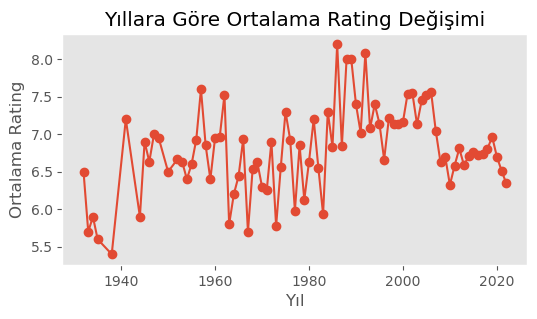

In [207]:
plt.figure(figsize=(6,3))
data.groupby('year')['rating'].mean().plot(kind='line', marker='o')
plt.title('Yıllara Göre Ortalama Rating Değişimi')
plt.xlabel('Yıl')
plt.ylabel('Ortalama Rating')
plt.grid(False)
plt.show()

### Yıllara göre filmlerin süre uzunluğu


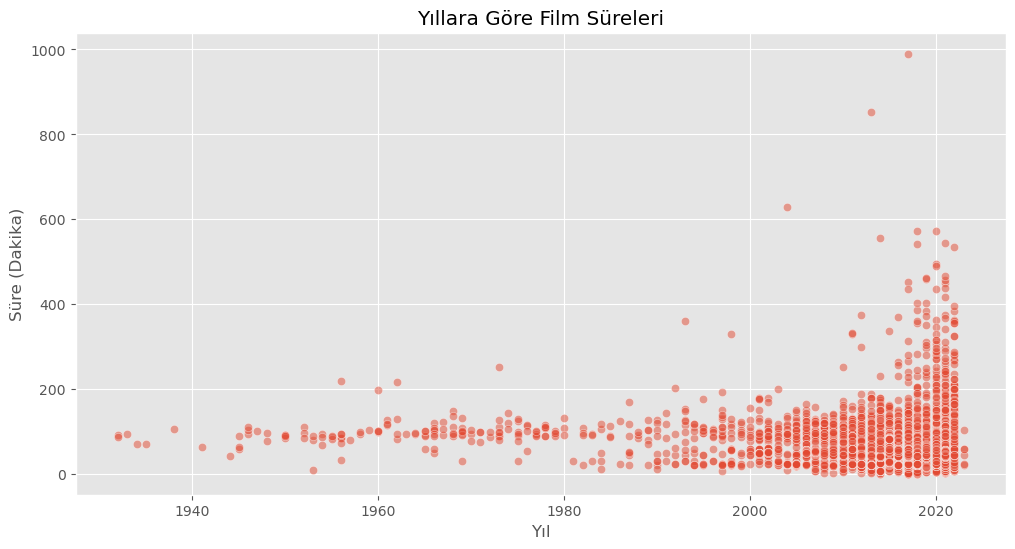

In [210]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=data, x='year', y='duration', alpha=0.5)
plt.title('Yıllara Göre Film Süreleri')
plt.xlabel('Yıl')
plt.ylabel('Süre (Dakika)')
plt.show()

### Genel Bakış

In [213]:
print(f"1. Ortalama Rating: {data['rating'].mean():.2f}")
print(f"2. En Uzun film: {data.loc[data['duration'].idxmax(), 'title']} ({data['duration'].max()} dakika)")
print(f"3. En Çok Oy Alan Film: {data.loc[data['votes'].idxmax(), 'title']} ({int(data['votes'].max())} oy)")
print(f"4. Ortalama film Süresi: {data['duration'].mean():.2f} dakika")

1. Ortalama Rating: 6.76
2. En Uzun film: The Vietnam War (990.0 dakika)
3. En Çok Oy Alan Film: The Lord of the Rings: The Fellowship of the Ring (1844075 oy)
4. Ortalama film Süresi: 73.77 dakika
